In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

import matplotlib.pyplot as plt

tf.config.list_physical_devices("GPU")

PATH = os.getcwd()
IMG_SIZE = (160, 160)


def get_val_dataset():
    validation_dir = os.path.join(PATH, "./test")
    validation_dataset = image_dataset_from_directory(
        validation_dir, shuffle=True, batch_size=203, image_size=IMG_SIZE
    )
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // 5)
    validation_dataset = validation_dataset.skip(val_batches // 5)

    print(
        "Number of validation batches: %d"
        % tf.data.experimental.cardinality(validation_dataset)
    )
    AUTOTUNE = tf.data.AUTOTUNE
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    return validation_dataset

In [2]:
model = tf.keras.models.load_model("./mobilenetv3small_batch32.tf")
validation_dataset_prefetch = get_val_dataset()
loss, accuracy = model.evaluate(validation_dataset_prefetch)
print("Test accuracy :", accuracy)

Found 203 files belonging to 2 classes.
Number of validation batches: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 3s 3s/step - loss: 0.5195 - accuracy: 0.7192
Test accuracy : 0.7192118167877197


Found 203 files belonging to 2 classes.
1


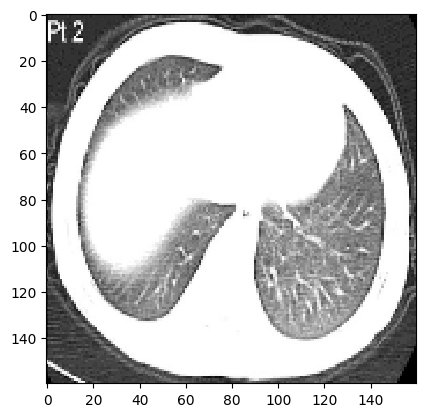

In [3]:
validation_dir = os.path.join(PATH, "./test")
validation_dataset = image_dataset_from_directory(
    validation_dir, shuffle=True, batch_size=203, image_size=IMG_SIZE
)
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()

print(label_batch[1])
plt.imshow(image_batch[1].astype(np.uint8))
plt.show()

In [4]:
def predict_by_one(input_img_fl32):
    predictions = model.predict(input_img_fl32[np.newaxis, :, :, :])
    predictions = tf.nn.sigmoid(predictions)
    predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()


def predict_by_one_tflite(input_img_fl32):
#     input_shape = input_details[0]["shape"]
    interpreter.set_tensor(
        input_details[0]["index"], input_img_fl32[np.newaxis, :, :, :]
    )
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]["index"])
    predictions = tf.nn.sigmoid(output_data)
    predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()

In [5]:
import time

In [6]:
count=0
for i in range(len(label_batch)):
    before = time.time()
    prediction = predict_by_one(image_batch[i])[0][0]
    in_ms_inf = time.time() - before
    print(in_ms_inf)
    if prediction == label_batch[i]:
        count+=1
        print(count)
#     print(predict_by_one(image_batch[i])[0][0])
#     print(label_batch[i])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1.0650558471679688
0.04916954040527344
1
0.04820752143859863
2
0.04631829261779785
3
0.0449521541595459
4
0.05383181571960449
0.044835567474365234
5
0.045285701751708984
0.0467228889465332
6
0.04700112342834473
7
0.04927778244018555
0.04586315155029297
8
0.045445919036865234
9
0.04545450210571289
10
0.0536646842956543
0.05449342727661133
11
0.09997010231018066
0.0958321094512

In [7]:
print("accuracy: ", (count/len(label_batch))*100)

accuracy:  76.35467980295566


In [8]:
interpreter = tf.lite.Interpreter(model_path="./mobilenetv3small_batch32.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


# print(output_data)

In [9]:
count=0
for i in range(len(label_batch)):
    before = time.time()
    prediction = predict_by_one_tflite(image_batch[i])[0][0]
    in_ms_inf = time.time() - before
    print(in_ms_inf)
    if prediction == label_batch[i]:
        count+=1
        print(count)
#     print(predict_by_one(image_batch[i])[0][0])
#     print(label_batch[i])

0.20676684379577637
0.14583230018615723
1
0.166306734085083
2
0.17176437377929688
3
0.16679024696350098
4
0.1525554656982422
0.14702248573303223
0.14543533325195312
0.14626121520996094
5
0.14463567733764648
6
0.14585232734680176
0.1445457935333252
7
0.14724183082580566
0.15758490562438965
0.15268826484680176
0.14801478385925293
0.14979338645935059
0.16654324531555176
8
0.16831731796264648
9
0.14562463760375977
10
0.1491396427154541
11
0.1454463005065918
12
0.1494431495666504
0.1446237564086914
13
0.14888238906860352
14
0.14496946334838867
15
0.15007686614990234
16
0.1614072322845459
0.17132019996643066
0.14425969123840332
0.14643311500549316
17
0.1565539836883545
18
0.0953361988067627
0.08386588096618652
19
0.08438229560852051
20
0.08506321907043457
21
0.08306288719177246
22
0.08329391479492188
23
0.08698797225952148
24
0.08650445938110352
0.09194111824035645
25
0.10457229614257812
26
0.09270334243774414
0.09405088424682617
27
0.09415411949157715
0.09194684028625488
0.09282088279724121

In [10]:
print("accuracy: ", (count/len(label_batch))*100)

accuracy:  73.39901477832512
